In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
mcdonalds=pd.read_csv("mcdonalds.csv")
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [43]:
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## Step 4 : Exploring Data

In [44]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [45]:
mcdonalds.shape

(1453, 15)

In [46]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [47]:
mc_11 = mcdonalds.iloc[:, :11].apply(lambda x: (x == "Yes") + 0)
col_means = mc_11.mean()
col_means_rounded = np.round(col_means, 2)
print(col_means_rounded)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [48]:
pca=PCA()
mc_pca=pca.fit(mc_11)

print("Importance of Components:")
print(pd.DataFrame({
    "Standard deviation": mc_pca.explained_variance_,
    "Proportion of Variance": mc_pca.explained_variance_ratio_,
    "Cumulative Proportion": mc_pca.explained_variance_ratio_.cumsum()
}, index=["PC"+str(i+1) for i in range(mc_11.shape[1])]))

Importance of Components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [49]:
print("Standard deviations (1, .., p=11):")
print(np.round(mc_pca.explained_variance_, 1))

Standard deviations (1, .., p=11):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [50]:
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(mc_pca.components_, columns=mc_11.columns))

Rotation (n x k) = (11 x 11):
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensi

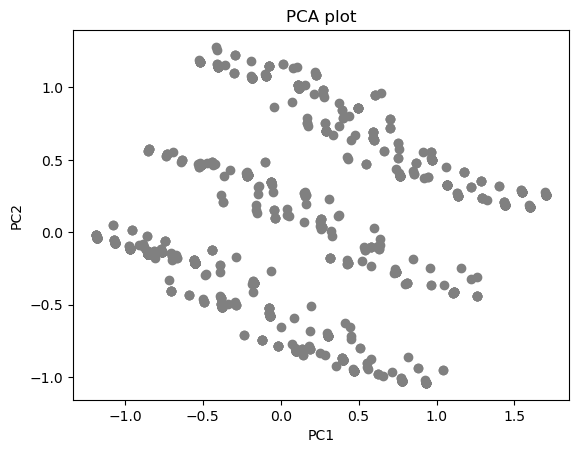

In [51]:
plt.scatter(mc_pca.transform(mc_11)[:, 0], mc_pca.transform(mc_11)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

## Step 5: Extracting Segments
### 5.1 : Using K-Means

In [52]:
from sklearn.cluster import KMeans

np.random.seed(1234)

cluster_results = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(mc_11)
    cluster_results.append(kmeans)

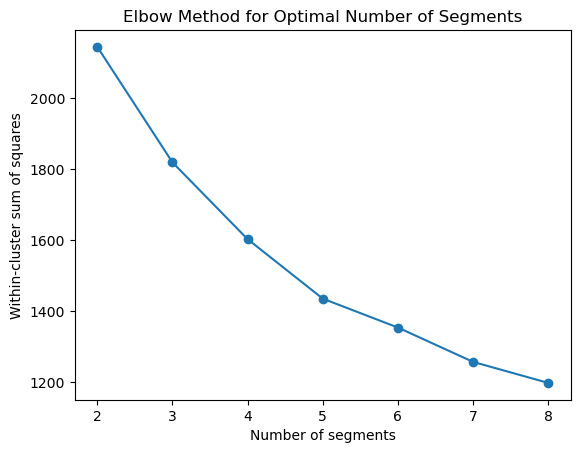

In [53]:
inertia = [kmeans.inertia_ for kmeans in cluster_results]
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method for Optimal Number of Segments')
plt.show()

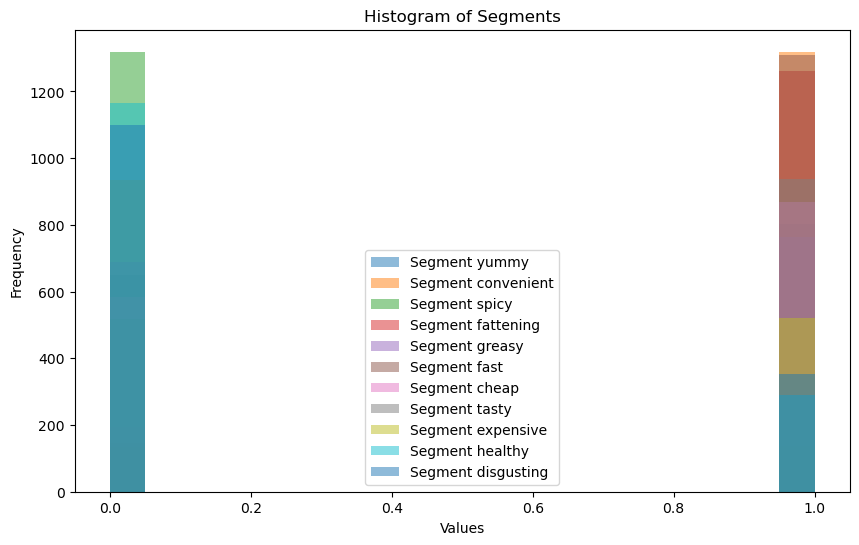

In [54]:
plt.figure(figsize=(10, 6))
for segment, data in mc_11.items():
    plt.hist(data, bins=20, alpha=0.5, label=f'Segment {segment}')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Segments')
plt.legend()
plt.show()


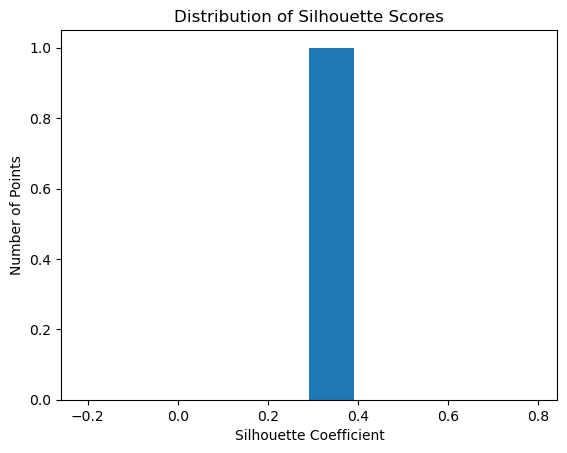

In [55]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = silhouette_score(mc_11,kmeans.labels_)
plt.hist(silhouette_coefficients)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Number of Points")
plt.title("Distribution of Silhouette Scores")
plt.show()



## 5.2 Using Mixtures of Distributions

In [56]:
from sklearn.mixture import GaussianMixture
np.random.seed(1234)

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(mc_11)
    print(f"Number of components: {k}")
    print(f"Converged: {model.converged_}")
    print(f"Log likelihood: {model.lower_bound_}")
    print(f"AIC: {model.aic(mc_11)}")
    print(f"BIC: {model.bic(mc_11)}")

Number of components: 2
Converged: True
Log likelihood: 7.672278681921454
AIC: -21985.641849663745
BIC: -21167.027071810353
Number of components: 3
Converged: True
Log likelihood: 11.078578848691944
AIC: -31728.350134298795
BIC: -30497.787274686918
Number of components: 4
Converged: True
Log likelihood: 13.528523524322978
AIC: -38691.88937591824
BIC: -37049.37843454788
Number of components: 5
Converged: True
Log likelihood: 16.520265726364997
AIC: -47229.89220081668
BIC: -45175.43317768784
Number of components: 6
Converged: True
Log likelihood: 18.17233529510538
AIC: -51874.81514663597
BIC: -49408.40804174865
Number of components: 7
Converged: True
Log likelihood: 18.203563599142456
AIC: -51809.97746232207
BIC: -48931.62227567627
Number of components: 8
Converged: True
Log likelihood: 17.13854797843942
AIC: -48558.62042527726
BIC: -45268.317156872974


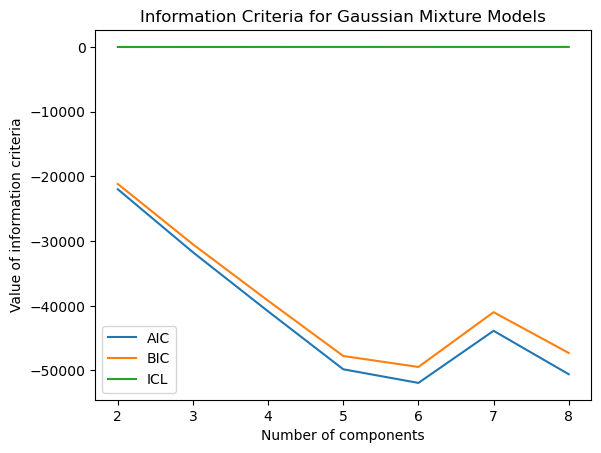

In [57]:
aic_values = []
bic_values = []
icl_values = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(mc_11)
    aic_values.append(model.aic(mc_11))
    bic_values.append(model.bic(mc_11))
    icl_values.append(model.lower_bound_)

plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.plot(range(2, 9), icl_values, label='ICL')
plt.xlabel('Number of components')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria for Gaussian Mixture Models')
plt.legend()
plt.show()

In [58]:
MD_m4 = GaussianMixture(n_components=4)
MD_m4.fit(mc_11)

kmeans_clusters = KMeans(n_clusters=4, random_state=1234).fit_predict(mc_11)

mixture_clusters = MD_m4.predict(mc_11)

kmeans_clusters_list = kmeans_clusters.tolist()
mixture_clusters_list = mixture_clusters.tolist()

kmeans_counts = {i: kmeans_clusters_list.count(i) for i in set(kmeans_clusters_list)}
mixture_counts = {i: mixture_clusters_list.count(i) for i in set(mixture_clusters_list)}

table = np.zeros((4, 4), dtype=int)
for i in range(4):
    for j in range(4):
        table[i, j] = kmeans_counts[j] if kmeans_counts[j] == mixture_counts[i] else 0

print(table)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Step 6: Profiling Segments

In [59]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage


MD_x_transposed = np.transpose(mc_11)

distances = pdist(MD_x_transposed)

MD_vclust = linkage(distances)

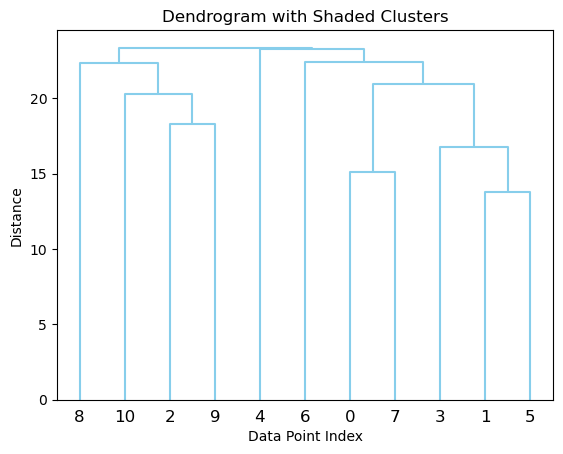

In [60]:
from scipy.cluster.hierarchy import dendrogram

MD_vclust_order = list(reversed(range(1, len(MD_vclust) + 1)))
dendrogram(MD_vclust, color_threshold=0, above_threshold_color='skyblue', orientation='top')

plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.title('Dendrogram with Shaded Clusters')

plt.show()


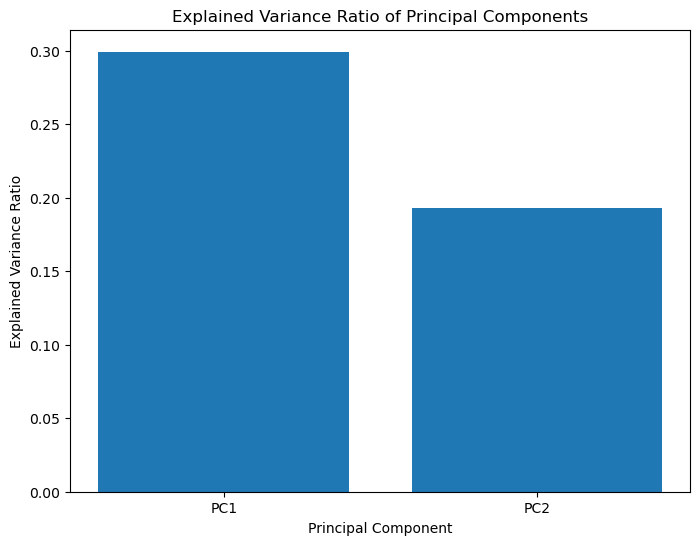

In [61]:
pca = PCA(n_components=2)
pca.fit(mc_11)

plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')

plt.show()

## Step 7: Describing Segments

## Step 8: Selecting (the) Target Segment(s)

In [ ]:
visit = mcdonalds.groupby(mc_11)['VisitFrequency'].mean()
print(visit)